In [1]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [132]:
dhours=[]
dcnt=[]
#opath='xst_mean'
fpath='sst2'
SSTdate='2022-10-09'
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f)) and (f[-4:]=='.npy') and (f[:14]=='SST_'+SSTdate)]
    print(len(files),files[0])
for i,f in enumerate(files):
    print(i,f)

24 SST_2022-10-09-00-33-53.npy
0 SST_2022-10-09-00-33-53.npy
1 SST_2022-10-09-01-33-53.npy
2 SST_2022-10-09-02-33-53.npy
3 SST_2022-10-09-03-33-53.npy
4 SST_2022-10-09-04-33-53.npy
5 SST_2022-10-09-05-33-53.npy
6 SST_2022-10-09-06-33-53.npy
7 SST_2022-10-09-07-33-53.npy
8 SST_2022-10-09-08-33-53.npy
9 SST_2022-10-09-09-33-53.npy
10 SST_2022-10-09-10-33-53.npy
11 SST_2022-10-09-11-33-53.npy
12 SST_2022-10-09-12-33-53.npy
13 SST_2022-10-09-13-33-53.npy
14 SST_2022-10-09-14-33-53.npy
15 SST_2022-10-09-15-33-53.npy
16 SST_2022-10-09-16-33-53.npy
17 SST_2022-10-09-17-33-53.npy
18 SST_2022-10-09-18-33-53.npy
19 SST_2022-10-09-19-33-53.npy
20 SST_2022-10-09-20-33-53.npy
21 SST_2022-10-09-21-33-53.npy
22 SST_2022-10-09-22-33-53.npy
23 SST_2022-10-09-23-33-53.npy


In [133]:
freqs=200-np.arange(512)/512*100
freq1=137;i2=np.argmin(np.abs(freqs-freq1))
freq2=138;i1=np.argmin(np.abs(freqs-freq2))
print(i2,i1,freqs[i1],freqs[i2])

323 317 138.0859375 136.9140625


In [134]:

D=[]
flist=[]
for f in files[:]:
  print(f)
  D2=np.load(fpath+'/'+f)[:,18:,i1:i2]
  ns=D2.shape
#  print(ns)
  if ns[0]!=3600: continue;
  D2=D2.reshape(ns[0]//10,10,ns[1],ns[2])
  D2=np.average(D2,axis=1)
  D.append(D2)
  flist.append(f)
  print("    ",D[-1].shape)
D=np.array(D)
print(D.shape)
ns=D.shape
D=D.reshape([ns[0]*ns[1],ns[2],ns[3]])
print(D.shape)


SST_2022-10-09-00-33-53.npy
     (360, 12, 6)
SST_2022-10-09-01-33-53.npy
     (360, 12, 6)
SST_2022-10-09-02-33-53.npy
     (360, 12, 6)
SST_2022-10-09-03-33-53.npy
     (360, 12, 6)
SST_2022-10-09-04-33-53.npy
     (360, 12, 6)
SST_2022-10-09-05-33-53.npy
     (360, 12, 6)
SST_2022-10-09-06-33-53.npy
     (360, 12, 6)
SST_2022-10-09-07-33-53.npy
     (360, 12, 6)
SST_2022-10-09-08-33-53.npy
     (360, 12, 6)
SST_2022-10-09-09-33-53.npy
     (360, 12, 6)
SST_2022-10-09-10-33-53.npy
     (360, 12, 6)
SST_2022-10-09-11-33-53.npy
     (360, 12, 6)
SST_2022-10-09-12-33-53.npy
     (360, 12, 6)
SST_2022-10-09-13-33-53.npy
     (360, 12, 6)
SST_2022-10-09-14-33-53.npy
     (360, 12, 6)
SST_2022-10-09-15-33-53.npy
     (360, 12, 6)
SST_2022-10-09-16-33-53.npy
     (360, 12, 6)
SST_2022-10-09-17-33-53.npy
     (360, 12, 6)
SST_2022-10-09-18-33-53.npy
     (360, 12, 6)
SST_2022-10-09-19-33-53.npy
     (360, 12, 6)
SST_2022-10-09-20-33-53.npy
     (360, 12, 6)
SST_2022-10-09-21-33-53.npy
     (

In [135]:
#D=np.array(D)
#print(D.shape)
#ns=D.shape
#D=D.reshape([ns[0]*ns[1],ns[2],ns[3]])
#print(D.shape)

1 -41.306778 7386
2 -59.777237 2486
5 -49.575806 2739


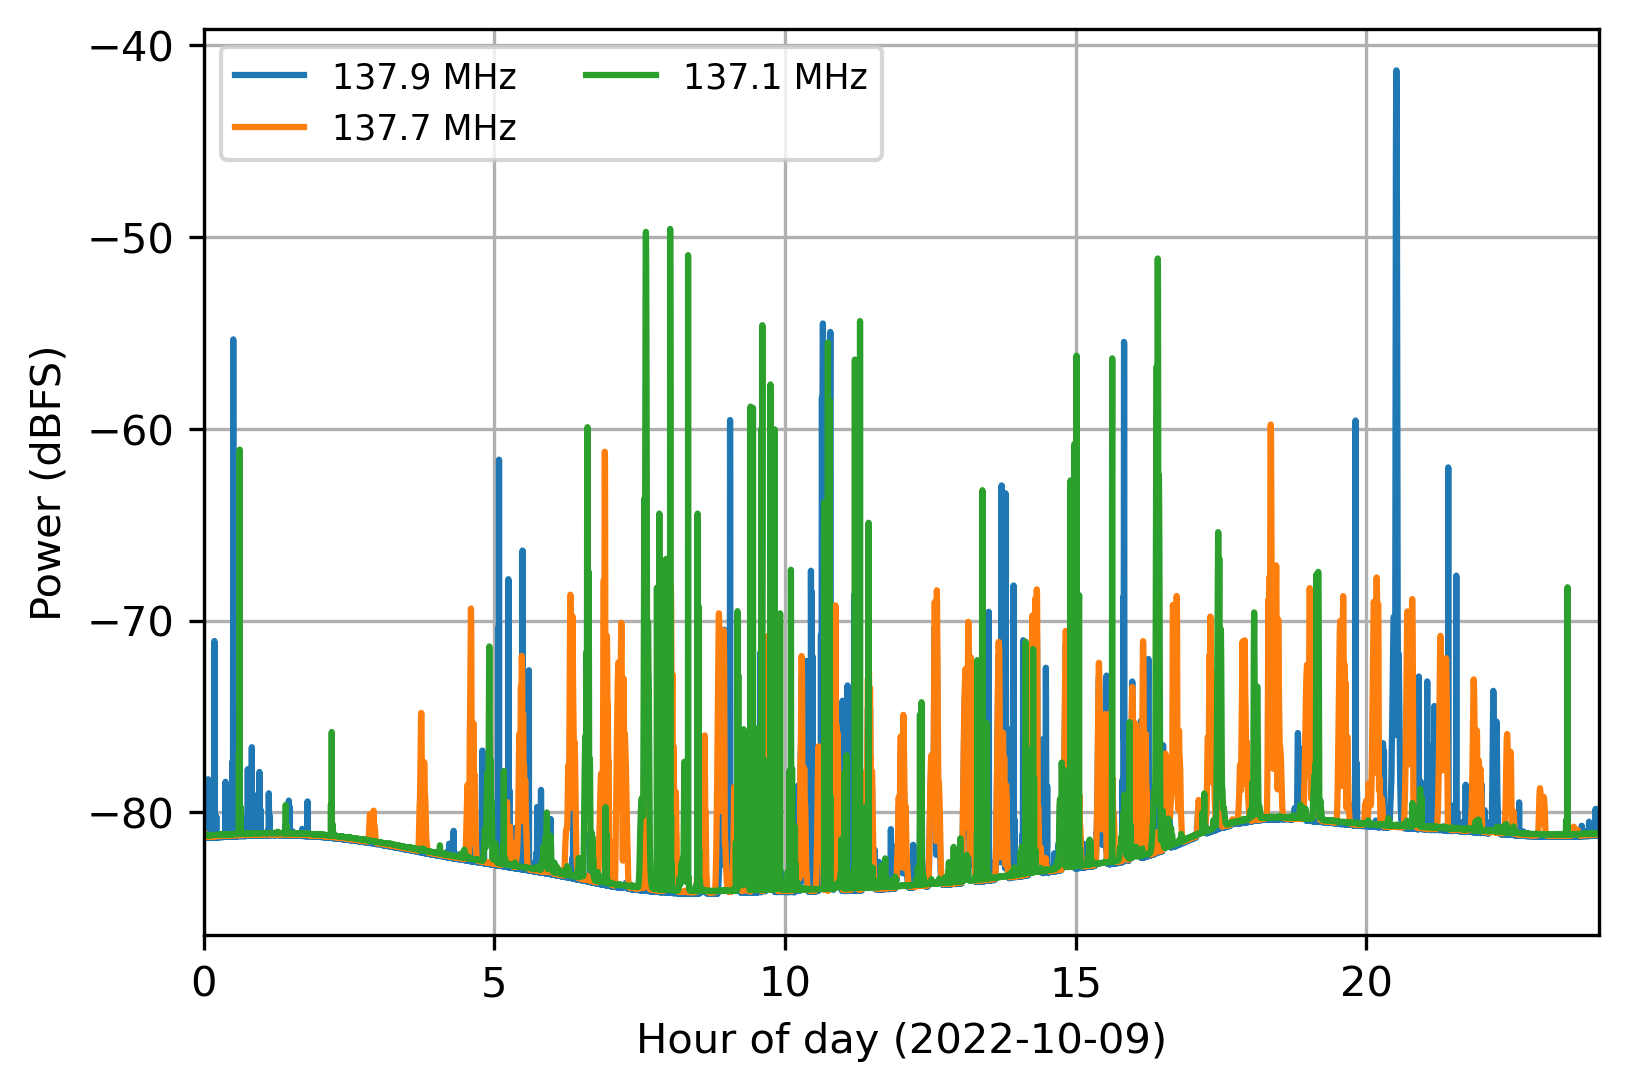

In [153]:
plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
hour_of_day=np.arange(D.shape[0])/6/60
for i in [1,2,5]:
#for i in range(6):
    plt.plot(hour_of_day,10*np.log10(D[:,0,i])-GainADC,label='%.1f MHz' % (freqs[i1+i]));
    print(i,np.max(10*np.log10(D[:,0,i])-GainADC),np.argmax(D[:,1,i]))
plt.xlim(0,24)
plt.ylabel('Power (dBFS)')
plt.legend(fontsize='small',ncol=2)
plt.xlabel('Hour of day (%s)'%SSTdate)
plt.grid()

In [148]:
#8 okt
#ix=7459
#bnd=1
#ix=6028
#bnd=5
#ix=2639
#bnd=2

#9 okt
ix=7386
bnd=1

filenr=ix//360
ix2=(ix%360)*10
print(filenr)

20


In [149]:
if True:
  f=flist[filenr]
  print(f)
  D2=np.load(fpath+'/'+f)[:,18:,i1:i2]


SST_2022-10-09-20-33-53.npy


(-3.0, 3.0)

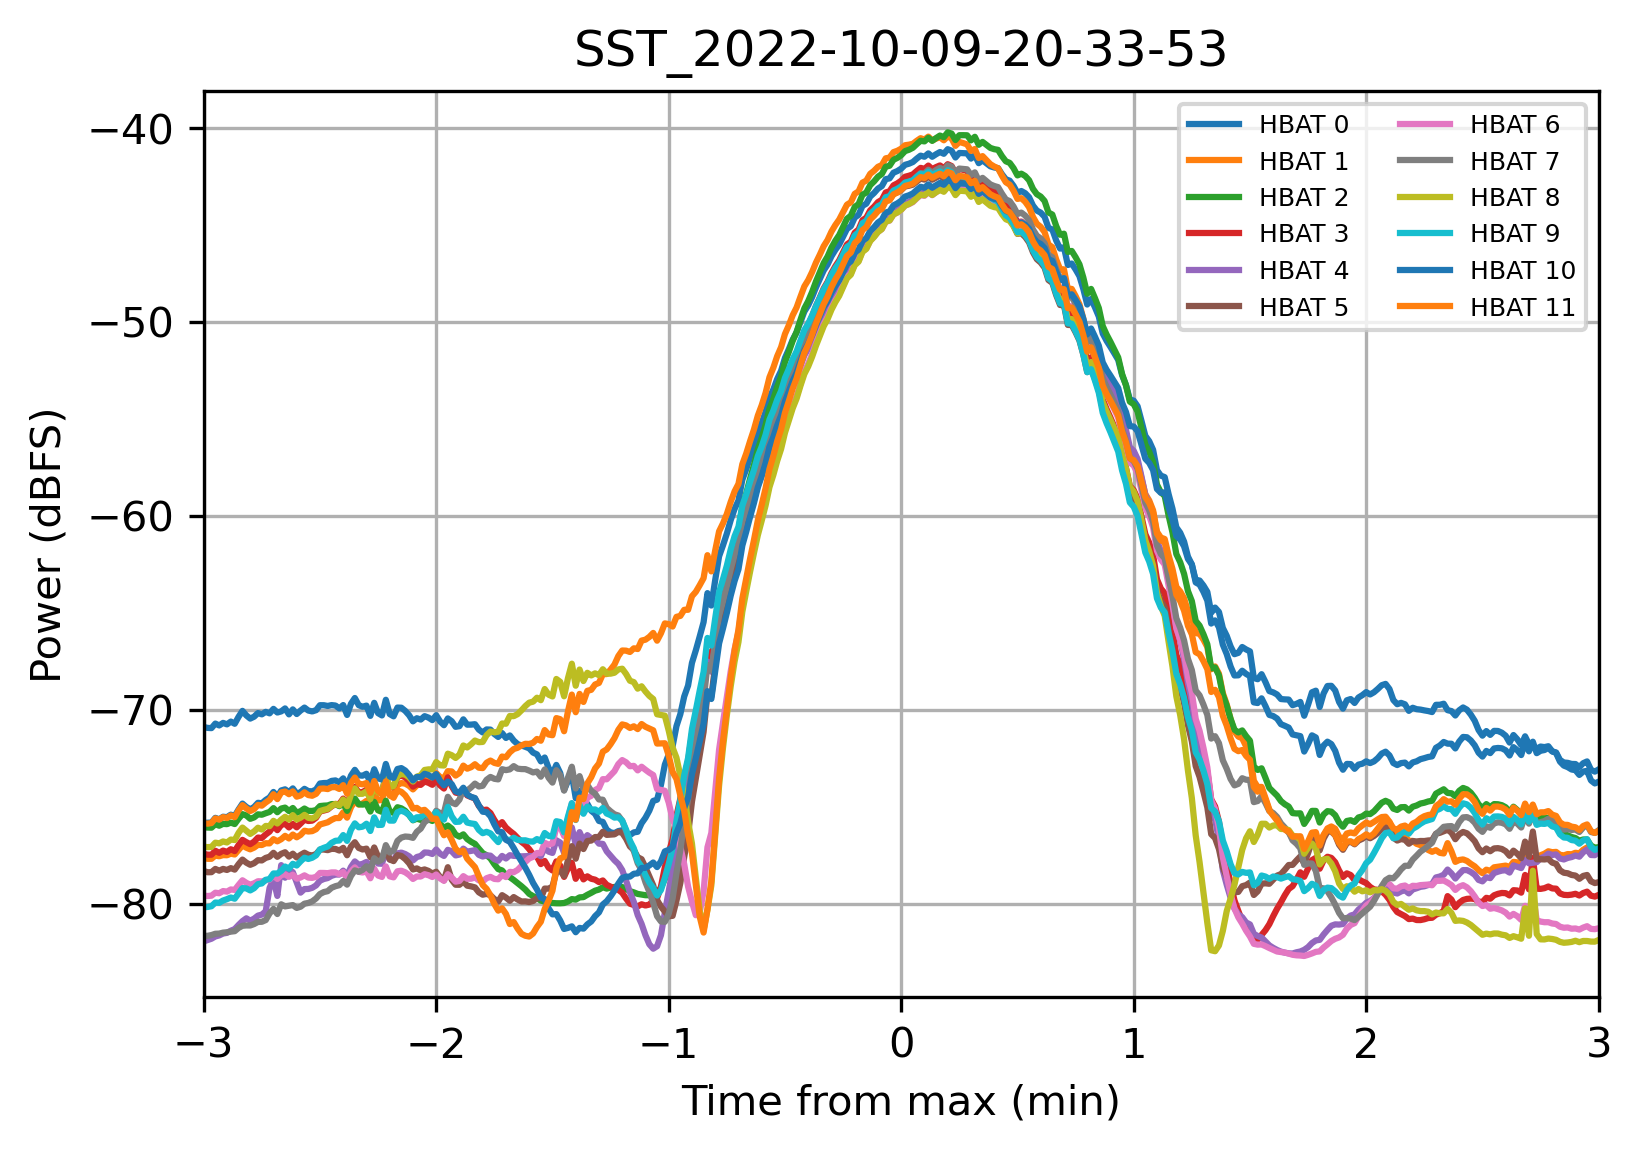

In [151]:
plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
time_min=(np.arange(400)-200)/60
for x in range(0,12):
    plt.plot(time_min,10*np.log10(D2[ix2-200:ix2+200,x,bnd])-GainADC,label='HBAT %i'%x);
#    plt.plot(10*np.log10(D2[:,x,bnd])-GainADC,label='HBAT %i'%x);
plt.grid()
#plt.xlim(-100,100)
plt.xlabel("Time from max (min)")
plt.ylabel("Power (dBFS)")
plt.legend(ncol=2,fontsize=6)
plt.title(flist[filenr][:-4])
plt.xlim(-3,3)

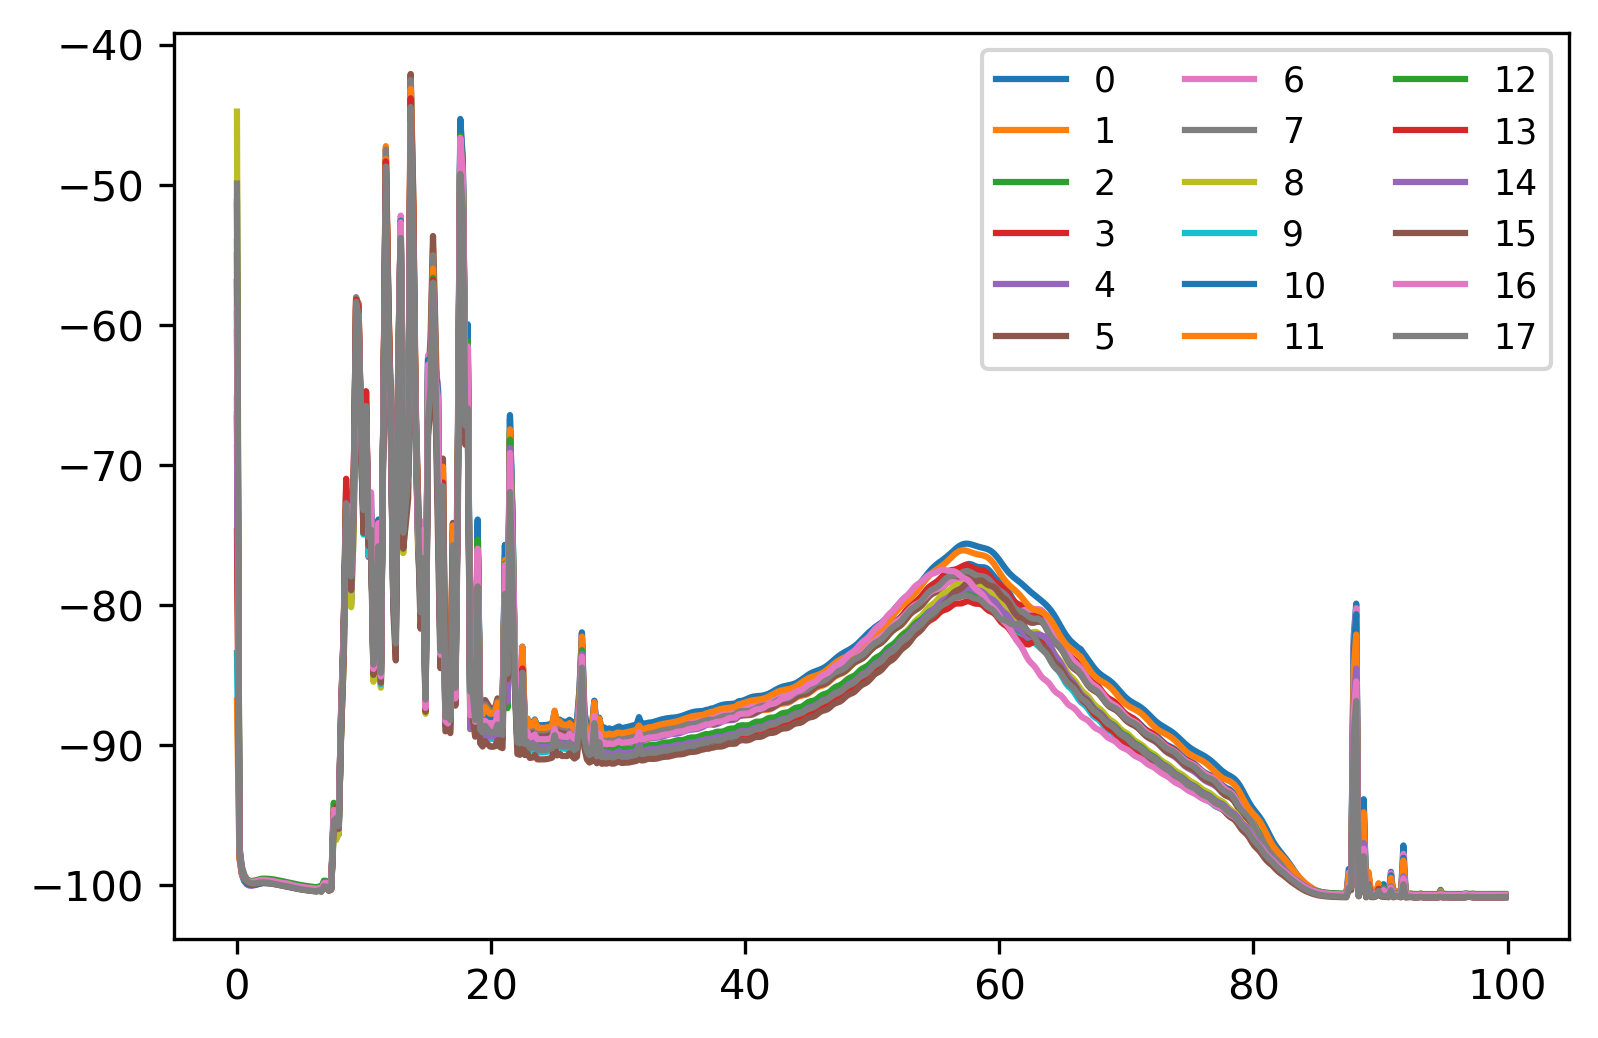

In [44]:
plt.figure(dpi=300)
Dm=np.percentile(D,50,axis=0)
freq=np.arange(512)/512*100
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
for i,si in enumerate(sis):
    plt.plot(freq,10*np.log10(Dm[i])-GainADC,label=str(si))
plt.legend(fontsize='small',ncol=3)

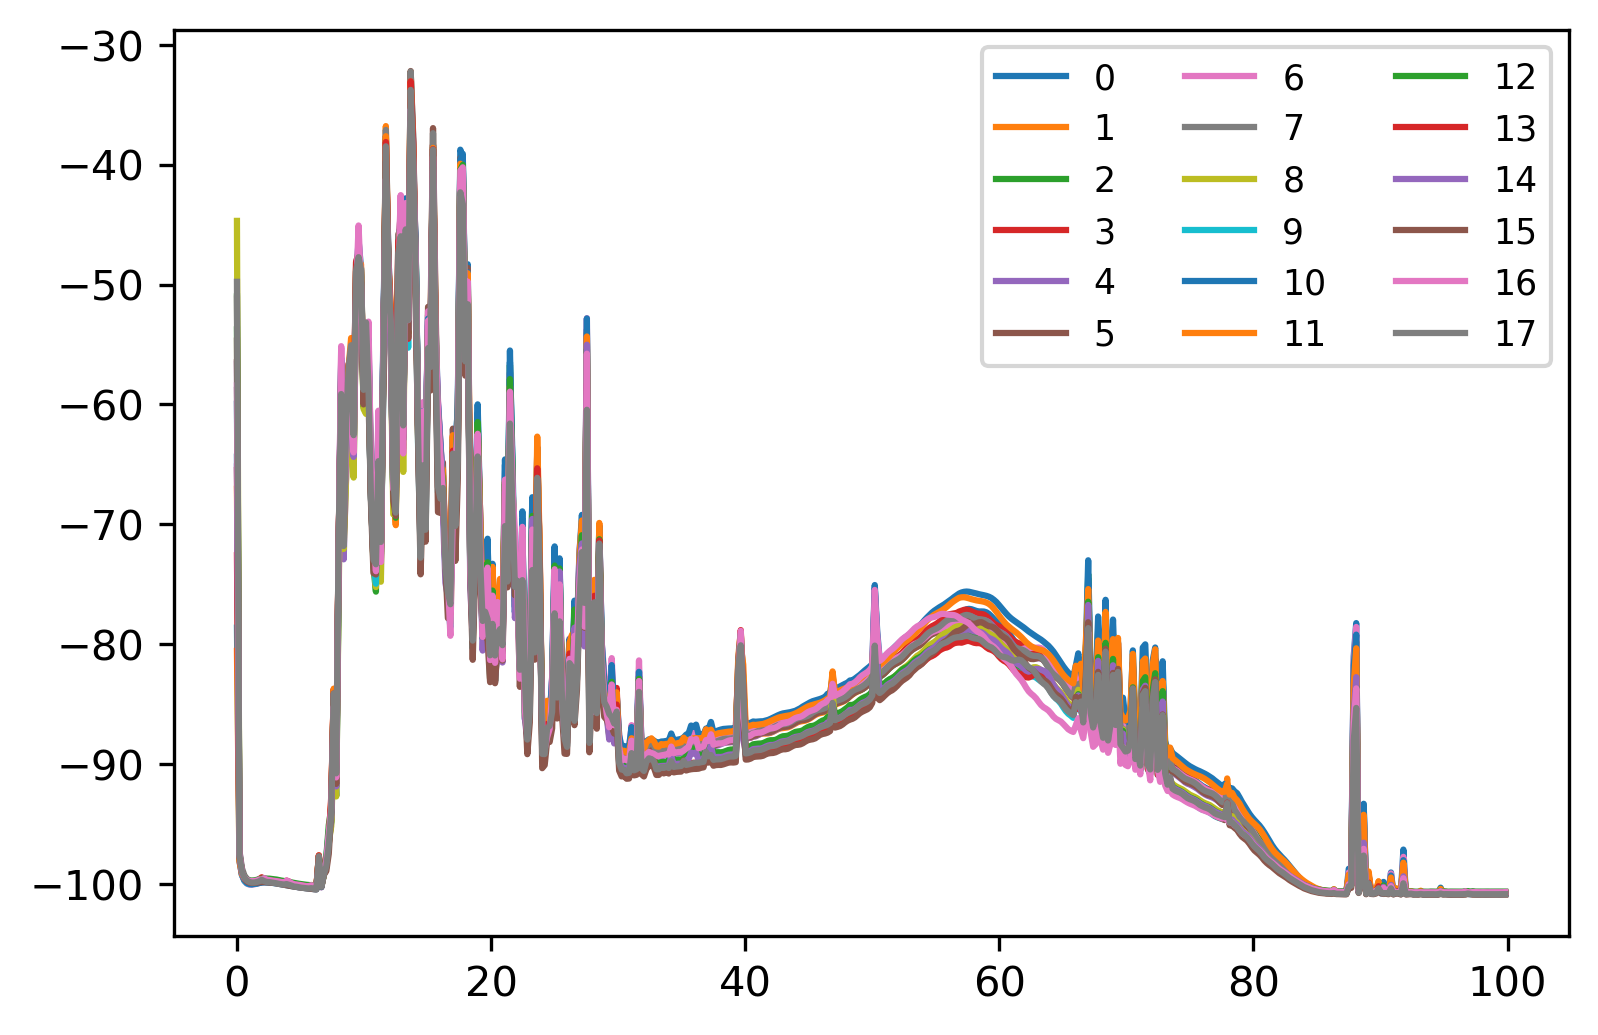

In [45]:
plt.figure(dpi=300)
Dm=np.max(D,axis=0)
freq=np.arange(512)/512*100
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
for i,si in enumerate(sis):
    plt.plot(freq,10*np.log10(Dm[i])-GainADC,label=str(si))
plt.legend(fontsize='small',ncol=3)

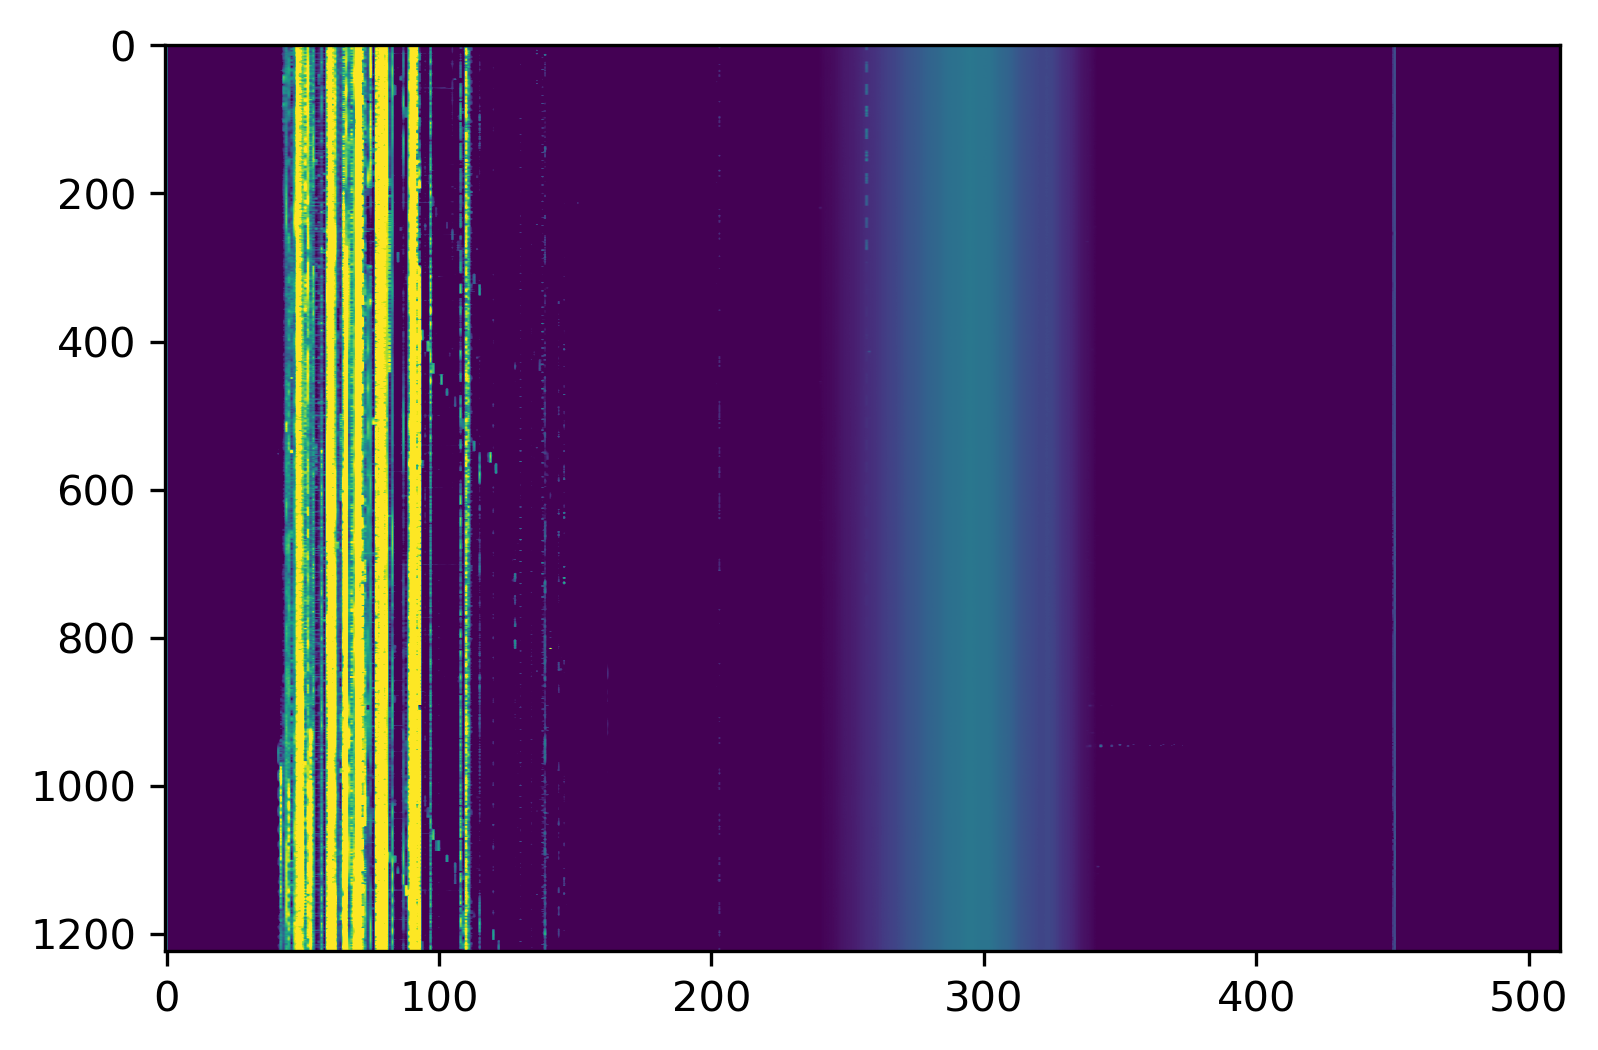

In [46]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,0,:])-GainADC,aspect='auto',vmin=-85,vmax=-65)

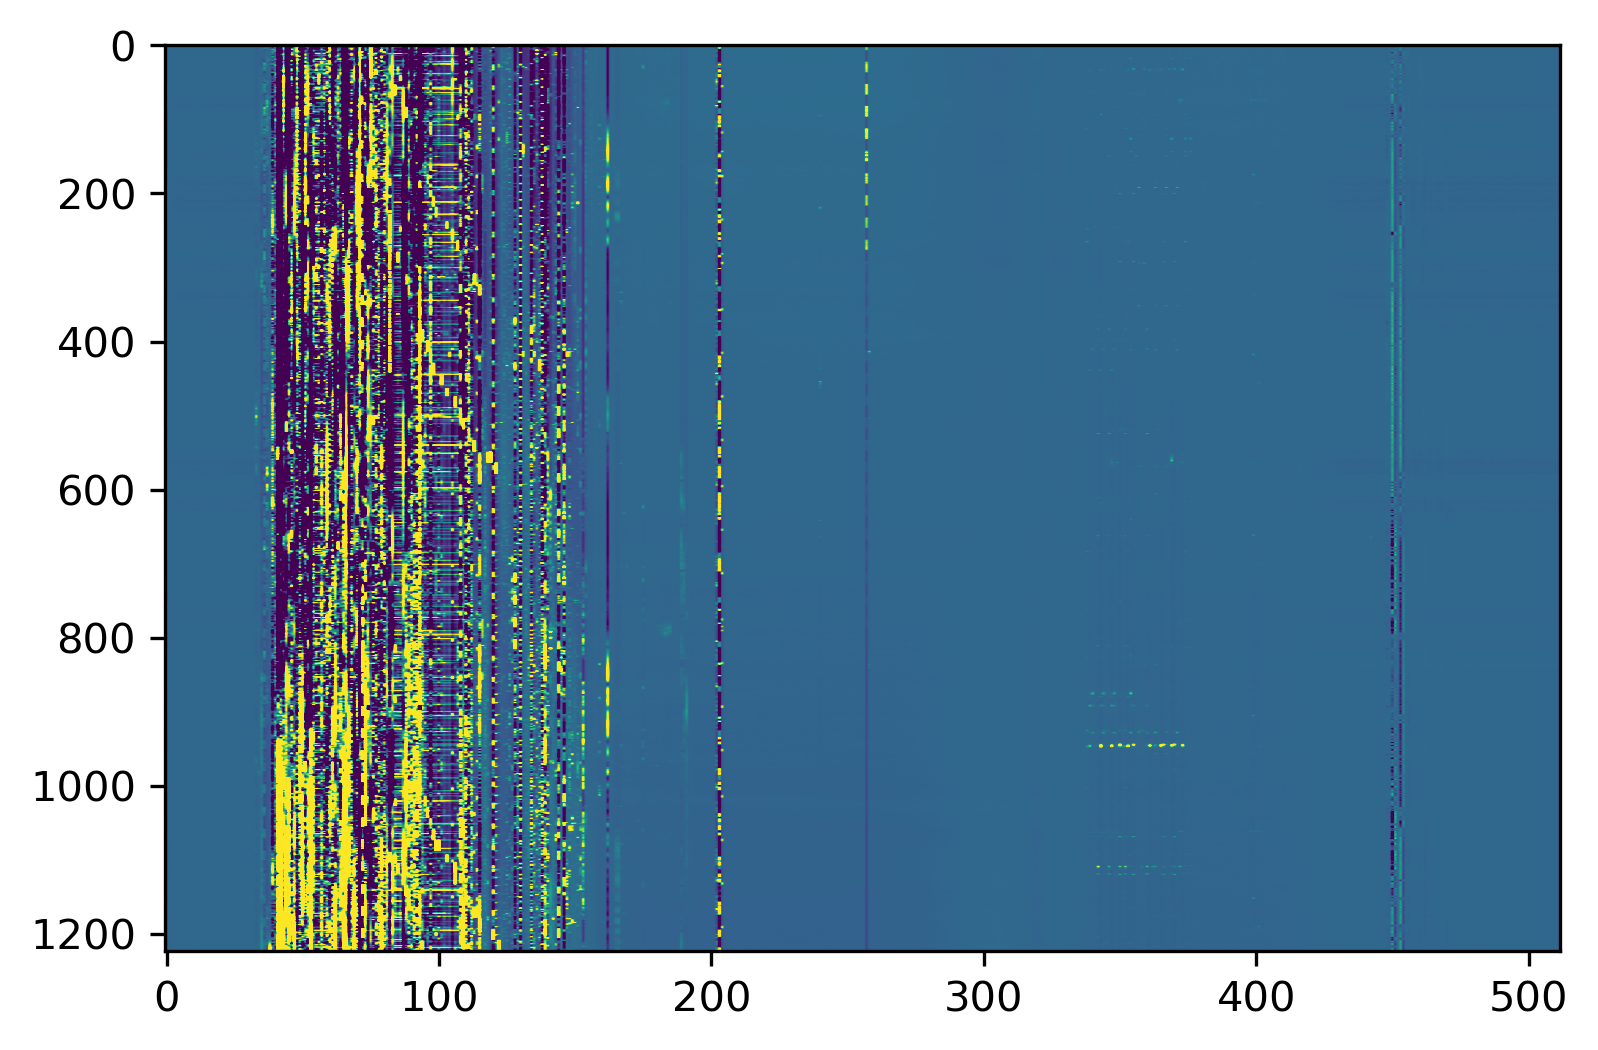

In [47]:
plt.figure(dpi=300)
XX=10*np.log10(D[:,:6,:]).mean(axis=1)
XX-=XX.mean(axis=0)

plt.imshow(XX,aspect='auto',vmin=-1,vmax=2)
#plt.xlim(150,450)
#plt.ylim(1500,2000)
#plt.colorbar()

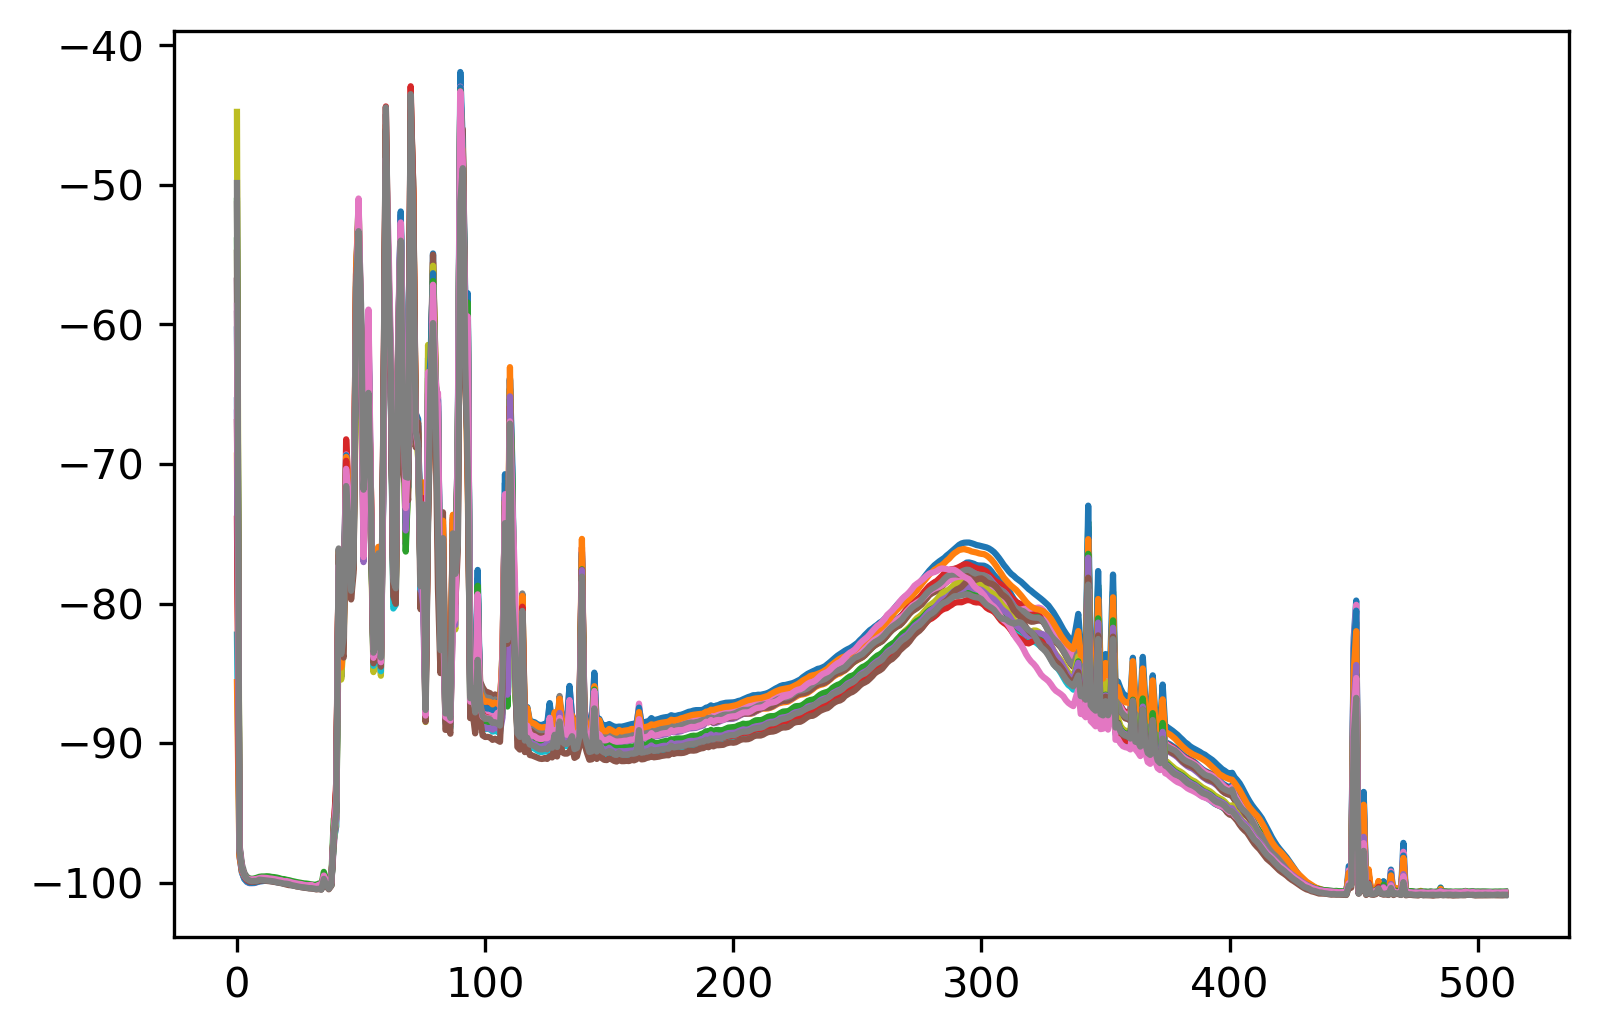

In [61]:
plt.figure(dpi=300)
plt.plot(10*np.log10(D[946,:,:]).T-GainADC);

/tmp/ipykernel_348197/2640272261.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10*np.log10(D[:,-1,:])-GainADC,aspect='auto',vmin=-85,vmax=-65)


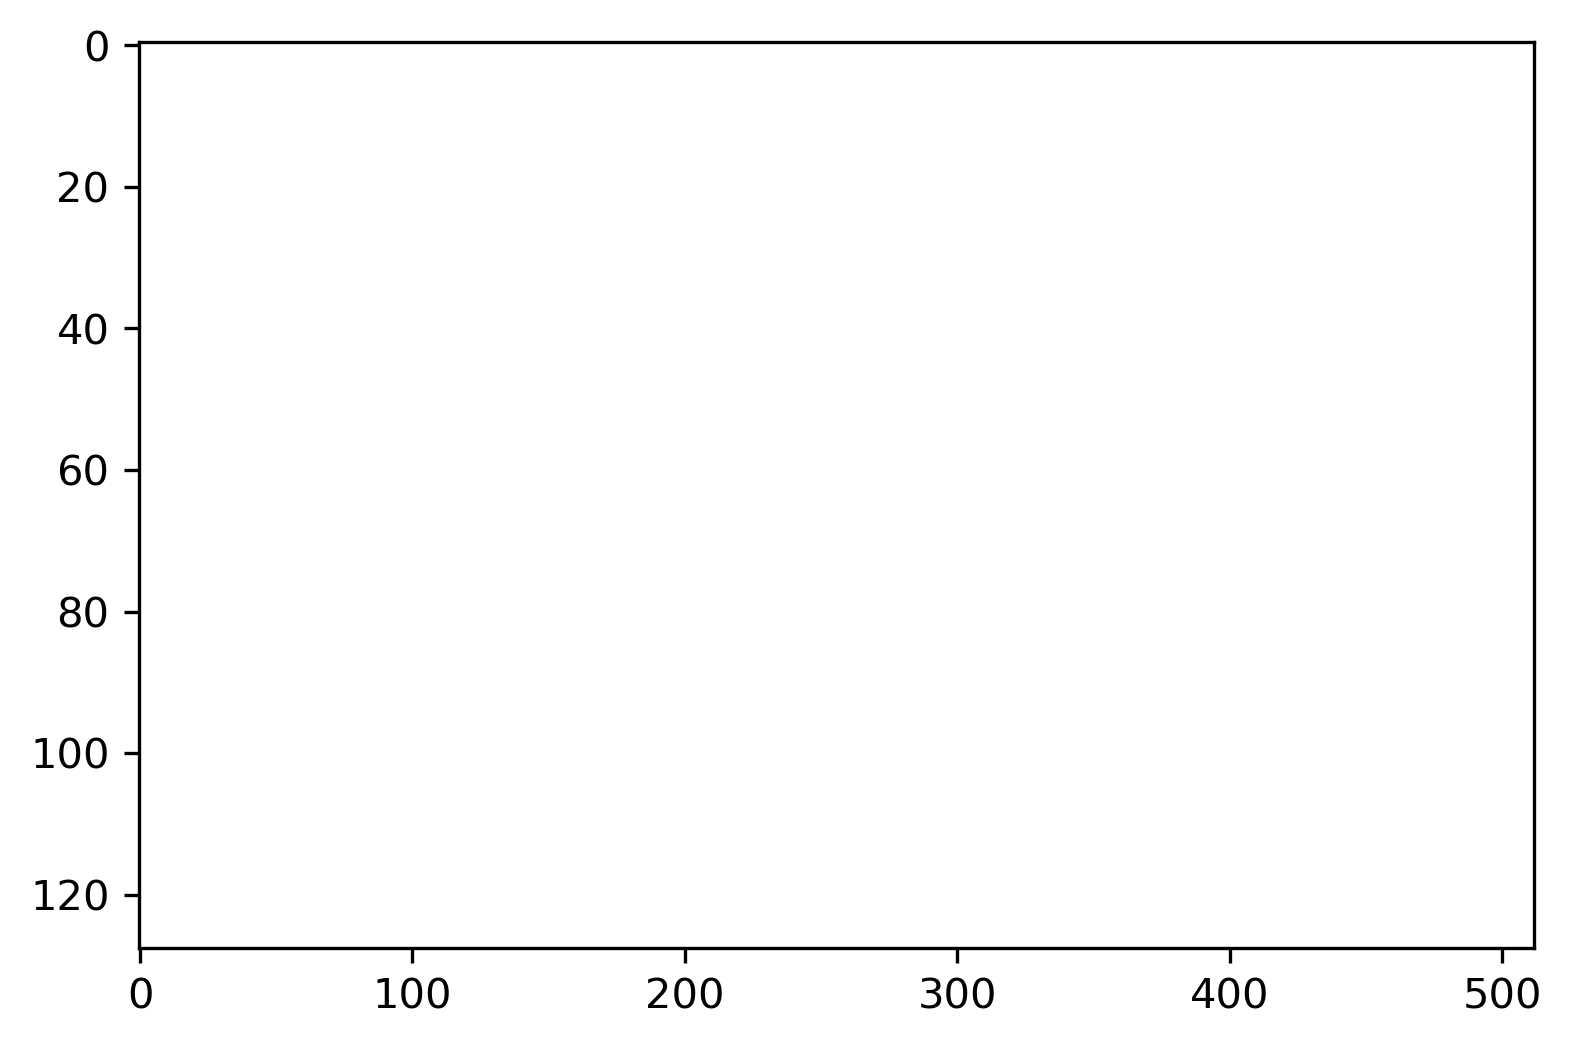

In [8]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,-1,:])-GainADC,aspect='auto',vmin=-85,vmax=-65)

In [15]:
print(sis[6])

18
